# Visualizations results

In [27]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from utils_visualizations import flatten_data, filter_and_boxplot

# remove waringns
import warnings
warnings.filterwarnings("ignore")

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_boxplots(data_x, data_y, title):
    # check data format
    data_x = np.array(data_x).flatten()
    data_y = np.array(data_y).flatten()

    # Create a figure and a single subplot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot box plots for data_x and data_y on the same subplot
    ax.boxplot([data_x, data_y], vert=False, labels=['stratified', 'unstratified'])
    ax.set_title(title)

    # Add labels and show the plot
    plt.tight_layout()
    plt.show()


## Load data for evaluation

In [48]:
# set file path
file1 = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/results_xgb1.json" #@nadja: einfach alles laden
file2 = "/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/results/xgb/results_xgb2.json"

# load data from json file
with open(file1) as f:
    data1 = json.load(f)

# load data from json file
with open(file2) as f:
    data2 = json.load(f)

data = data1 + data2 

# flatten dictionary and convert to dataframe
data_all_flatten, keys_dic = flatten_data(data)
data = pd.DataFrame(data_all_flatten)
print('Shape of data', data.shape)
print('Colum names of data', data.columns)
print('Number of Colums', data.columns.shape)
print('Keys of dictionary (', len(keys_dic), ')', keys_dic)


# check for duplicates ind data
print('Duplicates: ', data.astype(str).duplicated().sum())


data.head()

Shape of data (480, 87)
Colum names of data Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_noise',
       'model_info_transformation', 'model_info_group_size',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'cv_unstratified_iterations_mean_fit_time',
       'cv_unstratified_iterations_std_fit_time',
       'cv_unstratified_iterati

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_best_params_max_depth,unstratified_best_params_learning_rate,unstratified_best_params_gamma,unstratified_best_params_colsample_bytree,stratified_best_params_subsample,stratified_best_params_min_child_weight,stratified_best_params_max_depth,stratified_best_params_learning_rate,stratified_best_params_gamma,stratified_best_params_colsample_bytree
0,xgb,200,100000,8,0,identity,5,5,200,10,...,2,0.134000,1.394951,0.908199,0.728565,2,2,0.134000,2.714418,0.501764
1,xgb,200,100000,8,0,identity,5,5,200,10,...,2,0.267000,1.945888,0.501764,0.571732,7,4,0.267000,1.000000,0.924099
2,xgb,200,100000,8,0,identity,5,5,200,10,...,2,0.267000,1.945888,0.908199,0.912406,2,2,0.178333,1.000000,0.996156
3,xgb,200,100000,8,0,identity,5,5,200,10,...,2,0.267000,1.394951,0.924099,0.547729,3,2,0.178333,1.945888,0.817084
4,xgb,200,100000,8,0,identity,5,5,200,10,...,2,0.222667,1.000000,0.908199,0.669331,5,2,0.222667,1.000000,0.908199


## Descriptives
#### Single variables, no dictionnaries/lists
* repetition', 'random_state', 'hyperparameters_same'  
* 'running_time_unstratified', 'running_time_stratified', 'running_time_repetition', 'cv_unstratified_iterations_mean_fit_time'  


In [30]:
#  'hyperparameters_same'
data['hyperparameters_same'].value_counts()

hyperparameters_same
False    381
True      99
Name: count, dtype: int64

In [31]:
# check 'random_state' unique
print(len(data['random_state']))
print(len(data['random_state'].unique()))

480
480


In [32]:
# check 'repetition' complete
data['repetition'].value_counts().unique()

array([48])

### Data dictionnaries in json file

In [33]:
# overview of keys
print('keys_dic:', len(keys_dic), keys_dic)

keys_dic: 10 ['cv_folds_descriptives_stratified', 'unstratified_best_params', 'unstratified_results', 'cv_unstratified_iterations', 'cv_folds_descriptives_unstratified', 'cv_iteration_refit_test', 'stratified_best_params', 'stratified_results', 'model_info', 'cv_stratified_iterations']


#### model_info

In [34]:
# Filter columns that contain 'model_info'
key = 'model_info'
colum = [col for col in data.columns if key in col] 
colum

['model_info_model',
 'model_info_n_train',
 'model_info_n_test',
 'model_info_n_features',
 'model_info_noise',
 'model_info_transformation',
 'model_info_group_size',
 'model_info_n_folds',
 'model_info_n_iter',
 'model_info_n_repetitions',
 'model_info_scoring',
 'model_info_n_jobs',
 'model_info_json_file']

In [35]:
# give summary of every column
data_desciptives = data.loc[:, colum]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_noise,model_info_transformation,model_info_group_size,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,model_info_json_file
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,1,2,1,1,2,3,2,1,1,1,1,2,2
top,xgb,200,100000,8,0,identity,5,5,200,10,neg_mean_squared_error,-1,c:\Users\anneg\Documents\Documents\StatistikMa...
freq,480,240,480,480,240,160,240,480,480,480,480,240,240


In [36]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
xgb    480
Name: count, dtype: int64


model_info_n_train
200     240
1000    240
Name: count, dtype: int64


model_info_n_test
100000    480
Name: count, dtype: int64


model_info_n_features
8    480
Name: count, dtype: int64


model_info_noise
0    240
3    240
Name: count, dtype: int64


model_info_transformation
identity    160
log         160
sqrt        160
Name: count, dtype: int64


model_info_group_size
5     240
10    240
Name: count, dtype: int64


model_info_n_folds
5    480
Name: count, dtype: int64


model_info_n_iter
200    480
Name: count, dtype: int64


model_info_n_repetitions
10    480
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error    480
Name: count, dtype: int64


model_info_n_jobs
-1    240
1     240
Name: count, dtype: int64


model_info_json_file
c:\Users\anneg\Documents\Documents\StatistikMaster\slds_stratification\Simulations\Final_Setup/results/xgb/results_xgb1.json    240
c:\Users\anneg\Documents\Documents\StatistikMa

#### cv_folds_descreptives_stratified

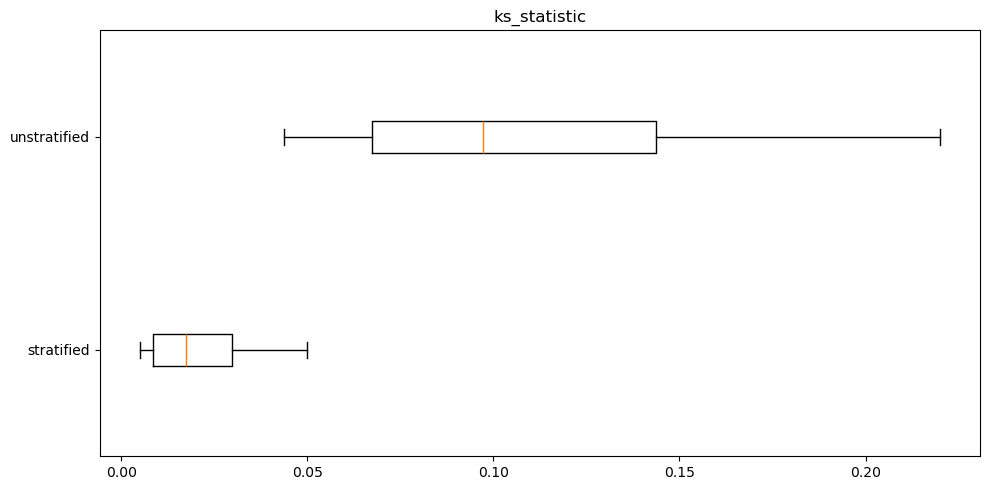

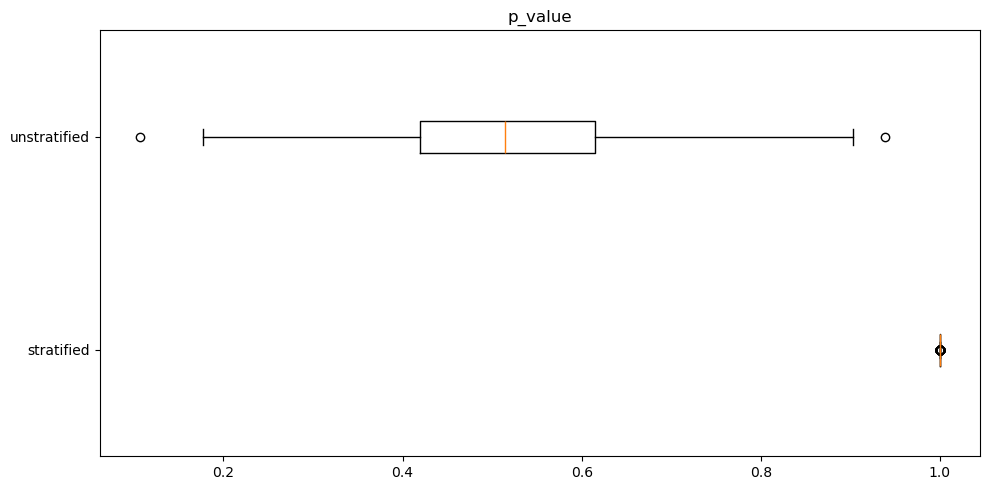

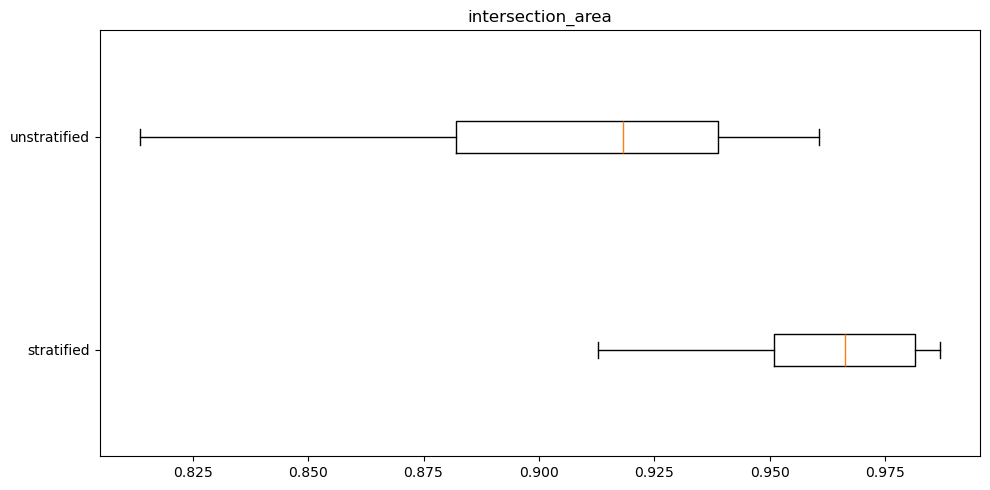

In [37]:
statistics = ['ks_statistic', 'p_value', 'intersection_area']

for s in statistics:
    s_stratified = '_stratified_' + s
    s_unstratified = '_unstratified_' + s
    s_stratified = [col for col in data.columns if s_stratified in col]
    s_unstratified = [col for col in data.columns if s_unstratified in col]
    #print(len(data[s_stratified]))

    plot_combined_boxplots(data_x= data[s_stratified], data_y = data[s_unstratified], title= s)

#### cv_unstratified_iterations

In [38]:
key = 'cv_stratified_iterations'
print(key)
colum1 = [col for col in data.columns if key in col]

key = 'cv_unstratified_iterations'
print(key)
colum2 = [col for col in data.columns if key in col]

colum = colum1 + colum2

print(len(colum))

cv_stratified_iterations
cv_unstratified_iterations
38


In [39]:
data[colum]

,cv_stratified_iterations_mean_fit_time,cv_stratified_iterations_std_fit_time,cv_stratified_iterations_mean_score_time,cv_stratified_iterations_std_score_time,cv_stratified_iterations_param_subsample,cv_stratified_iterations_param_min_child_weight,cv_stratified_iterations_param_max_depth,cv_stratified_iterations_param_learning_rate,cv_stratified_iterations_param_gamma,cv_stratified_iterations_param_colsample_bytree,...,cv_unstratified_iterations_param_colsample_bytree,cv_unstratified_iterations_params,cv_unstratified_iterations_split0_test_score,cv_unstratified_iterations_split1_test_score,cv_unstratified_iterations_split2_test_score,cv_unstratified_iterations_split3_test_score,cv_unstratified_iterations_split4_test_score,cv_unstratified_iterations_mean_test_score,cv_unstratified_iterations_std_test_score,cv_unstratified_iterations_rank_test_score
0,"[0.027923393249511718, 0.042226743698120114, 0...","[0.006600344297056225, 0.012700891112091823, 0...","[0.0011597156524658203, 0.0038197517395019533,...","[0.0012619123312839345, 0.00321682510659734, 0...","[0.8971042469046939, 0.7869561337994082, 0.683...","[8, 4, 6, 4, 4, 6, 2, 9, 1, 5, 8, 9, 4, 7, 3, ...","[13, 9, 6, 3, 8, 15, 6, 2, 12, 2, 2, 12, 2, 8,...","[0.4, 0.17833333333333334, 0.22266666666666668...","[7.368062997280774, 1.945887717576389, 7.36806...","[0.8820778966886844, 0.6235105443733604, 0.639...",...,"[0.8820778966886844, 0.6235105443733604, 0.639...","[{'subsample': 0.8971042469046939, 'min_child_...","[-4.771900325510631, -4.452141486608797, -5.14...","[-5.237691483198617, -3.5364195212921614, -4.8...","[-7.577698406250913, -6.933985930387427, -5.68...","[-2.2782790417436662, -4.688148124642865, -3.6...","[-2.992504961631156, -3.1881571704925435, -2.6...","[-4.571614843666997, -4.559770446684759, -4.38...","[1.8586709159574673, 1.3109945903951759, 1.120...","[106, 105, 92, 31, 146, 86, 58, 39, 161, 10, 1..."
1,"[0.020168352127075195, 0.029610538482666017, 0...","[0.0065453274462514005, 0.002617280192338406, ...","[0.010685539245605469, 0.00028352737426757814,...","[0.0064076414724149305, 0.0005670547485351563,...","[0.9124058985008132, 0.7869561337994082, 0.728...","[6, 9, 5, 5, 3, 7, 9, 3, 1, 3, 1, 1, 6, 1, 5, ...","[2, 2, 8, 17, 10, 4, 10, 15, 5, 6, 17, 2, 2, 4...","[0.04533333333333334, 0.134, 0.045333333333333...","[10.278085328021955, 10.278085328021955, 7.368...","[0.6392109540681201, 0.9240993106161051, 0.924...",...,"[0.6392109540681201, 0.9240993106161051, 0.924...","[{'subsample': 0.9124058985008132, 'min_child_...","[-6.351631056985758, -4.0621216186042, -5.3738...","[-3.3955551744331287, -2.6356008420080945, -2....","[-10.474994254880489, -6.276952382628341, -8.4...","[-4.176896919607592, -2.7417798071970862, -2.6...","[-3.7533507647745075, -2.7370852074254155, -3....","[-5.630485634136295, -3.6907079715726274, -4.6...","[2.6313792628904578, 1.396403977595382, 2.1229...","[174, 38, 104, 57, 167, 31, 196, 192, 94, 148,..."
2,"[0.02305741310119629, 0.08970856666564941, 0.0...","[0.007898301858257488, 0.008817038278850787, 0...","[0.009304475784301759, 0.0013016700744628907, ...","[0.007597072665207207, 0.0016769463292916227, ...","[0.9562265517861566, 0.7869561337994082, 0.669...","[8, 3, 9, 1, 1, 6, 6, 9, 3, 7, 8, 3, 2, 9, 5, ...","[2, 17, 2, 12, 5, 8, 4, 5, 10, 3, 5, 2, 5, 2, ...","[0.267, 0.08966666666666667, 0.311333333333333...","[5.281951900505005, 1.394950793962421, 1.94588...","[0.6392109540681201, 0.8820778966886844, 0.749...",...,"[0.6392109540681201, 0.8820778966886844, 0.749...","[{'subsample': 0.9562265517861566, 'min_child_...","[-2.496964991426654, -3.762629471409612, -2.95...","[-3.8921354651345537, -4.767376959028816, -3.4...","[-3.3487201403838767, -2.8209915444901155, -3....","[-3.226687743761615, -2.7815844087727495, -1.8...","[-3.5101509114920866, -4.686246691548515, -3.3...","[-3.2949318504397573, -3.763765815049962, -3.0...","[0.4576620910583321, 0.8615928536341612, 0.619...","[16, 43, 7, 171, 176, 138, 66, 31, 179, 187, 1..."
3,

In [40]:
colum

['cv_stratified_iterations_mean_fit_time',
 'cv_stratified_iterations_std_fit_time',
 'cv_stratified_iterations_mean_score_time',
 'cv_stratified_iterations_std_score_time',
 'cv_stratified_iterations_param_subsample',
 'cv_stratified_iterations_param_min_child_weight',
 'cv_stratified_iterations_param_max_depth',
 'cv_stratified_iterations_param_learning_rate',
 'cv_stratified_iterations_param_gamma',
 'cv_stratified_iterations_param_colsample_bytree',
 'cv_stratified_iterations_params',
 'cv_stratified_iterations_split0_test_score',
 'cv_stratified_iterations_split1_test_score',
 'cv_stratified_iterations_split2_test_score',
 'cv_stratified_iterations_split3_test_score',
 'cv_stratified_iterations_split4_test_score',
 'cv_stratified_iterations_mean_test_score',
 'cv_stratified_iterations_std_test_score',
 'cv_stratified_iterations_rank_test_score',
 'cv_unstratified_iterations_mean_fit_time',
 'cv_unstratified_iterations_std_fit_time',
 'cv_unstratified_iterations_mean_score_time',
 

Fit time stratified vs. unstratiffied:

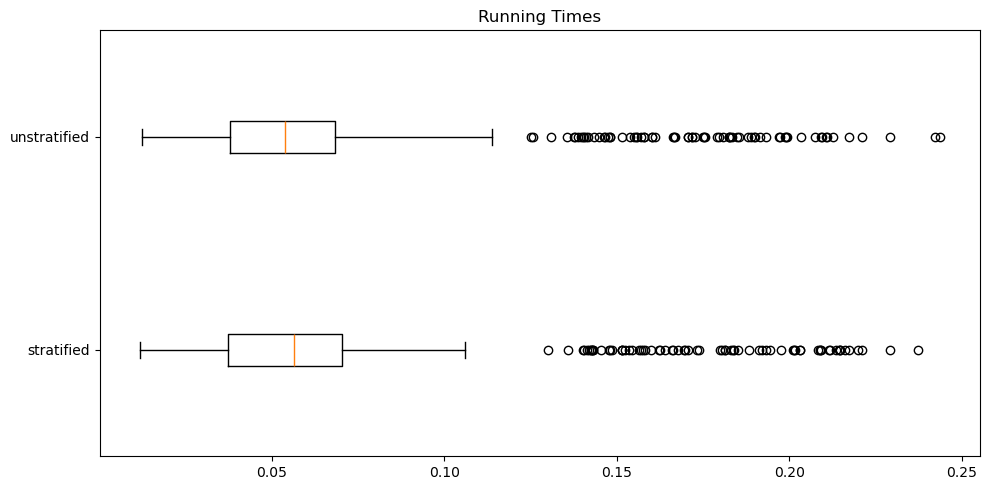

In [41]:
mean_fit_time_stratified = [np.mean(x) for x in data['cv_stratified_iterations_mean_fit_time']]
mean_fit_time_unstratified = [np.mean(x) for x in data['cv_unstratified_iterations_mean_fit_time']]

plot_combined_boxplots( mean_fit_time_stratified, mean_fit_time_unstratified, 'Running Times')

Unstratified: Negative MSE

In [42]:
print(f"Unstratified: Negative MSE {np.mean(data['cv_unstratified_iterations_mean_test_score'].explode().tolist())} with sd of  {np.sqrt(np.var(data['cv_unstratified_iterations_std_test_score'].explode().tolist()))}")
print(f"Stratified: Negative MSE {np.mean(data['cv_stratified_iterations_mean_test_score'].explode().tolist())} with sd of {np.sqrt(np.var(data['cv_stratified_iterations_std_test_score'].explode().tolist()))}")

Unstratified: Negative MSE -3.5826795038311583 with sd of  1.1228972721201702
Stratified: Negative MSE -3.529686087743538 with sd of 0.7911329570705492


In [43]:
from scipy.stats import spearmanr

correlation_coefficient_list = []
p_value_list = []

# Calculate Spearman's correlation coefficient and p-value for each iteration
for i in range(len(data['cv_stratified_iterations_mean_test_score'])):
    correlation_coefficient, p_value = spearmanr(data['cv_stratified_iterations_rank_test_score'][0], data['cv_unstratified_iterations_rank_test_score'][0])
    correlation_coefficient_list.append(correlation_coefficient)
    p_value_list.append(p_value)

# Print the mean and variance of the correlation coefficient
print("Mean of correlation coefficient:", np.mean(correlation_coefficient_list))
print("Variance of correlation coefficient:", np.var(correlation_coefficient_list))

# Print the mean and variance of the p-value
print("Mean of p-value:", np.mean(p_value_list))
print("Variance of p-value:", np.var(p_value_list))


Mean of correlation coefficient: 0.907522618707432
Variance of correlation coefficient: 1.1093356479670479e-31
Mean of p-value: 1.5803545209107583e-76
Variance of p-value: 9.413749473058141e-184


#### Gerneralisierungsfehler

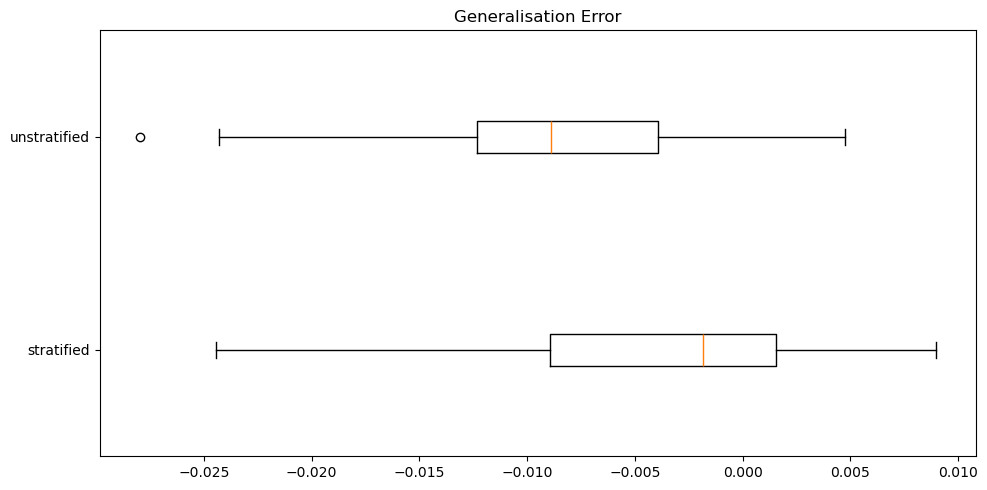

In [44]:
gen_error_stratified_list = []
gen_error_unstratified_list = []

for i in range(len(data)):
    # generalisation error: stratified
    gen_error_stratified = np.array(data['cv_iteration_refit_test_mse'][i]) + np.array(data['cv_stratified_iterations_mean_test_score'][i])
    gen_error_stratified
    # generalisation error: unstratified
    gen_error_unstratified = np.array(data['cv_iteration_refit_test_mse'][i]) + np.array(data['cv_unstratified_iterations_mean_test_score'][i])
    gen_error_unstratified_list.append(gen_error_unstratified)


# plot gen_error_stratified and gen_error_unstratified in two boxplots next to each other

plot_combined_boxplots(gen_error_stratified, gen_error_unstratified, title = 'Generalisation Error')


Best Hyperparmetrs: TBD

#### cv_iteration_refit_test'

In [45]:
key = 'cv_iteration_refit_test'
print(key)
colum= [col for col in data.columns if key in col]
colum

cv_iteration_refit_test


['cv_iteration_refit_test_r2',
 'cv_iteration_refit_test_mse',
 'cv_iteration_refit_test_mae']

#### Boxplots Evaluation metrics:  'unstratified_results' and 'stratified_results'

(20, 87)
(20, 87)


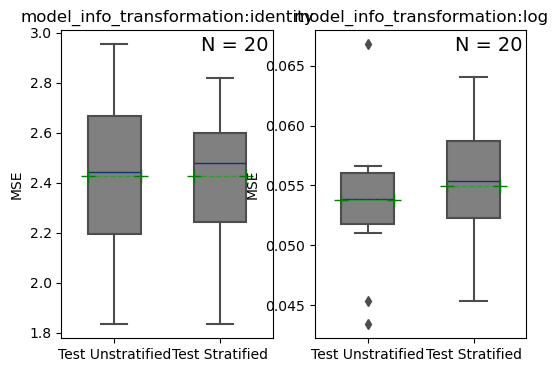

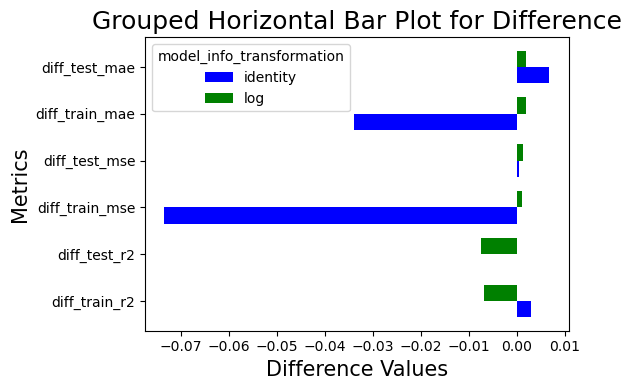

                mean_diff   sd_diff
diff_train_r2    0.002947  0.007321
diff_test_r2    -0.000017  0.010935
diff_train_mse  -0.073401  0.177473
diff_test_mse    0.000398  0.261079
diff_train_mae  -0.033823  0.101015
diff_test_mae    0.006776  0.067076
                mean_diff   sd_diff
diff_train_r2   -0.006883  0.017262
diff_test_r2    -0.007534  0.023356
diff_train_mse   0.001051  0.002520
diff_test_mse    0.001204  0.003733
diff_train_mae   0.001813  0.006060
diff_test_mae    0.001803  0.006817


In [49]:
parameter_grid = {
    "model_info_model": 'xgb',
    "model_info_transformation": None,
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": 0,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 'identity'
value2 = 'log'

df1, df2 = filter_and_boxplot(data, parameter_grid, value1, value2)
print(df1)
print(df2)

(20, 87)
(20, 87)


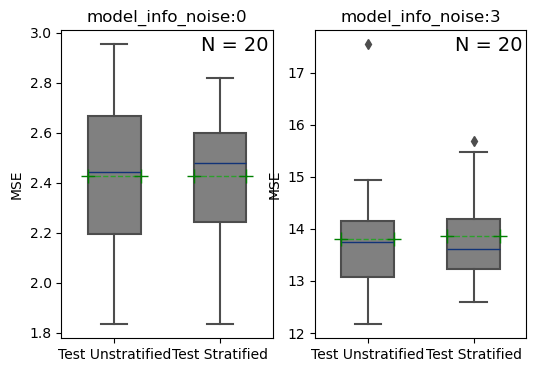

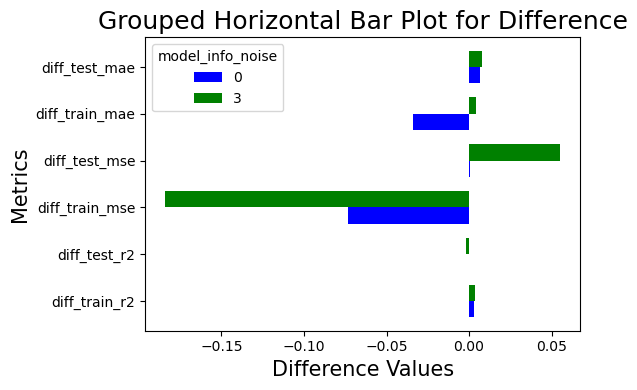

                mean_diff   sd_diff
diff_train_r2    0.002947  0.007321
diff_test_r2    -0.000017  0.010935
diff_train_mse  -0.073401  0.177473
diff_test_mse    0.000398  0.261079
diff_train_mae  -0.033823  0.101015
diff_test_mae    0.006776  0.067076
                mean_diff   sd_diff
diff_train_r2    0.003575  0.056308
diff_test_r2    -0.001680  0.029880
diff_train_mse  -0.184190  1.902110
diff_test_mse    0.055167  0.981215
diff_train_mae   0.003914  0.438072
diff_test_mae    0.007840  0.102054


In [50]:
parameter_grid = {
    "model_info_model": 'xgb',
    "model_info_transformation": 'identity',
    "model_info_n_train": 200,
    "model_info_group_size": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_noise": None,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 0
value2 = 3

df1, df2 = filter_and_boxplot(data, parameter_grid, value1, value2)
print(df1)
print(df2)